In [2]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

<h4>XGBoost</h4>
https://xgboost.readthedocs.io/en/latest/ <br>
https://xgboost.readthedocs.io/en/latest/python/python_api.html?highlight=api#module-xgboost.sklearn <br>
https://www.lfd.uci.edu/~gohlke/pythonlibs <br>

In [3]:
from matplotlib import pyplot as plt
from matplotlib import rcParams
import numpy as np
from pathlib import Path
import pandas as pd
import seaborn as sns
from tqdm.notebook import tqdm
import warnings
from xgboost import XGBRegressor
from xgboost import plot_importance
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score

In [4]:
rcParams['figure.figsize'] = (16, 8)
plt.style.use('fivethirtyeight')
pd.set_option('max_columns', 100)
pd.set_option("display.precision", 4)
warnings.simplefilter('ignore')

<h4>학습데이터 로드</h4>

In [5]:
ls "./DACON"

 C 드라이브의 볼륨: SSD
 볼륨 일련 번호: BCA4-98AF

 C:\Users\inhoinno\DACON 디렉터리

2020-09-19  오후 08:21    <DIR>          .
2020-09-19  오후 08:21    <DIR>          ..
2020-09-10  오후 12:55                43 .gitattributes
2020-09-09  오후 11:59    <DIR>          .ipynb_checkpoints
2020-09-19  오후 08:17        11,060,442 EDA_train_Inhoinno(ing).ipynb
2020-09-10  오후 12:42       132,988,145 feature.csv
2020-09-10  오후 12:36         2,897,812 pandasdemo.ipynb
2020-09-10  오후 12:42           800,010 sample_submission.csv
2020-09-10  오후 12:42        18,936,246 test.csv
2020-09-10  오후 12:42        76,278,443 train.csv
2020-09-10  오후 12:37    <DIR>          단국대천체모형
               7개 파일         242,961,141 바이트
               4개 디렉터리  105,389,932,544 바이트 남음


In [6]:
data_dir = Path('./DACON')
trn_file = data_dir / 'train.csv'
tst_file = data_dir / 'test.csv'
feature_file = data_dir / 'feature.csv'
seed = 42


In [18]:
train = pd.read_csv(feature_file)
test = pd.read_csv(tst_file)

print(train.info())
print(test.info())
print(train.shape)
train.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400000 entries, 0 to 399999
Data columns (total 21 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   id          400000 non-null  int64  
 1   z           400000 non-null  float64
 2   redshift    400000 non-null  float64
 3   dered_u     400000 non-null  float64
 4   dered_g     400000 non-null  float64
 5   dered_r     400000 non-null  float64
 6   dered_i     400000 non-null  float64
 7   dered_z     400000 non-null  float64
 8   nObserve    400000 non-null  float64
 9   airmass_u   400000 non-null  float64
 10  class       400000 non-null  float64
 11  d_dered_u   400000 non-null  float64
 12  d_dered_g   400000 non-null  float64
 13  d_dered_r   400000 non-null  float64
 14  d_dered_i   400000 non-null  float64
 15  d_dered_z   400000 non-null  float64
 16  d_dered_ig  400000 non-null  float64
 17  d_dered_zg  400000 non-null  float64
 18  d_dered_rz  400000 non-null  float64
 19  d_

,id,z,redshift,dered_u,dered_g,dered_r,dered_i,dered_z,nObserve,airmass_u,class,d_dered_u,d_dered_g,d_dered_r,d_dered_i,d_dered_z,d_dered_ig,d_dered_zg,d_dered_rz,d_dered_iz,d_obs_det
0,0,16.9396,-8.1086e-05,23.1243,20.2578,18.9551,17.6321,16.9089,2.9444,1.1898,0.0,-0.1397,-0.0790,-0.0544,-0.0403,-0.0307,-2.6257,-3.3488,2.0462,0.7232,-15.0556
1,1,13.1689,4.5061e-03,14.9664,14.0045,13.4114,13.2363,13.1347,0.6931,1.2533,1.0,-0.0857,-0.0574,-0.0410,-0.0322,-0.0343,-0.7683,-0.8698,0.2767,0.1016,-0.3069
2,2,15.3500,4.7198e-04,16.6076,15.6866,15.4400,15.3217,15.2961,1.0986,1.0225,0.0,-0.1787,-0.1388,-0.0963,-0.0718,-0.0540,-0.3649,-0.3905,0.1440,0.0257,-0.9014
3,3,19.6346,5.8143e-06,25.3536,20.9947,20.0873,19.7947,19.5552,1.6094,1.2054,0.0,-0.3070,-0.1941,-0.1339,-0.1003,-0.0795,-1.2000,-1.4395,0.5321,0.2395,-1.3906
4,4,17.9826,-3.3247e-05,23.7714,20.4338,18.8630,18.1903,17.8759,2.6391,1.1939,0.0,-0.6820,-0.2653,-0.1794,-0.1339,-0.1067,-2.2436,-2.5579,0.9871,0.3144,-9.3609


In [21]:
train.describe()

,id,z,redshift,dered_u,dered_g,dered_r,dered_i,dered_z,nObserve,airmass_u,class,d_dered_u,d_dered_g,d_dered_r,d_dered_i,d_dered_z,d_dered_ig,d_dered_zg,d_dered_rz,d_dered_iz,d_obs_det
count,400000.0000,400000.0000,4.0000e+05,400000.0000,400000.0000,400000.0000,400000.0000,400000.0000,400000.0000,400000.0000,400000.0000,400000.0000,400000.0000,400000.0000,400000.0000,400000.0000,400000.0000,400000.0000,400000.0000,400000.0000,400000.0000
mean,199999.5000,16.9299,5.8663e-02,19.6301,18.2344,17.6162,17.1654,16.8695,1.4869,1.1758,0.6931,-0.2238,-0.1545,-0.1203,-0.0352,-0.0605,-1.0690,-1.3650,0.7467,0.2960,-4.6557
std,115470.1982,52.2879,5.3757e-01,1.9231,15.9262,1.4736,22.4364,35.4365,0.9060,0.1163,1.1827,0.6995,11.9595,0.3700,25.0963,36.8790,15.8618,31.6886,35.4171,27.4294,7.6973
min,0.0000,-23955.8178,-1.6605e+02,-42.8375,-9999.0000,-16.3802,-9999.0000,-9999.0000,0.6931,1.0001,-1.0000,-66.3661,-69.3194,-46.9576,-26.3505,-16975.3922,-10017.1270,-10017.2590,-17.7428,-16.6637,-38.1933
25%,99999.7500,16.2888,3.5184e-05,18.5651,17.3492,16.7879,16.4537,16.2334,0.6931,1.0882,0.0000,-0.2341,-0.1649,-0.1137,-0.0847,-0.0700,-1.2335,-1.5268,0.3074,0.0845,-3.2082
50%,199999.5000,16.9184,4.7127e-02,19.2652,18.0229,17.4444,17.0881,16.8701,1.0986,1.1793,1.0000,-0.1342,-0.1015,-0.0702,-0.0523,-0.0406,-0.9168,-1.1179,0.5343,0.2012,-0.9014
75%,299999.2500,17.7297,9.4629e-02,20.1981,18.8902,18.2922,17.9075,17.6560,1.7918,1.2276,2.0000,-0.0706,-0.0633,-0.0440,-0.0325,-0.0208,-0.6017,-0.6959,0.7149,0.2965,-0.3069
max,399999.0000,6976.3922,6.2323e+01,30.8899,30.9529,31.9572,32.0162,30.7813,3.8067,2.0508,2.0000,42.2511,7556.3656,30.1964,13956.8178,13956.8178,21.8604,27.7746,10016.8755,10016.5565,2.7377


AttributeError: 'DataFrame' object has no attribute 'u'

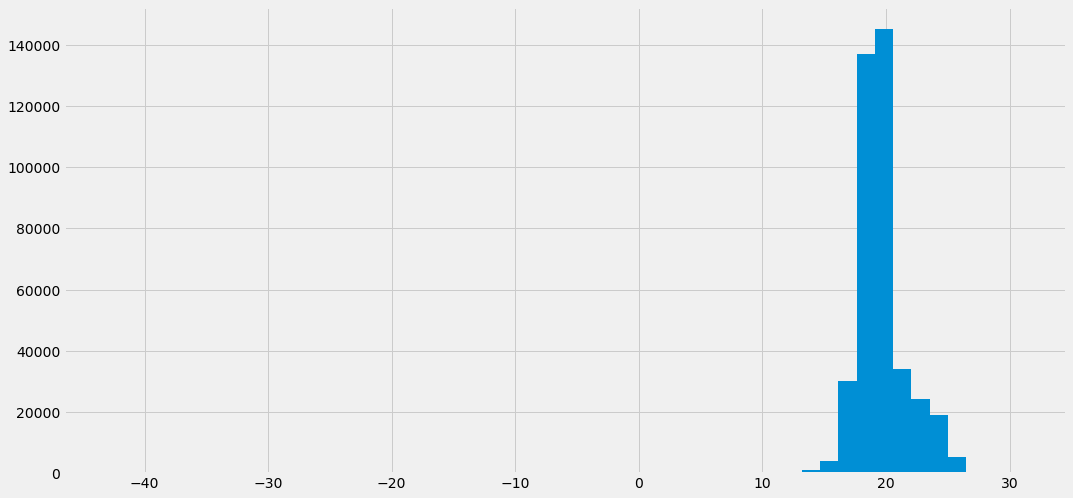

In [11]:
train.dered_u.hist(bins=50)
train.u.hist(bins=50)
test.dered_u.hist(bins=50)
test.u.hist(bins=50)

In [12]:
traintest.dered_u.hist(bins=50)
traintest.u.hist(bins=50)

NameError: name 'traintest' is not defined

In [39]:
target_col = 'u'
pred_col = 'pred'
num_cols = [x for x in train.columns if train[x].dtype in [np.int64, np.float64] and x != target_col]
print(num_cols)

['id', 'g', 'r', 'i', 'z', 'redshift', 'dered_u', 'dered_g', 'dered_r', 'dered_i', 'dered_z', 'nObserve', 'nDetect', 'airmass_u', 'airmass_g', 'airmass_r', 'airmass_i', 'airmass_z', 'class']


In [19]:
sns.pairplot(data=train, vars=num_cols + [target_col], size=5)

NameError: name 'num_cols' is not defined

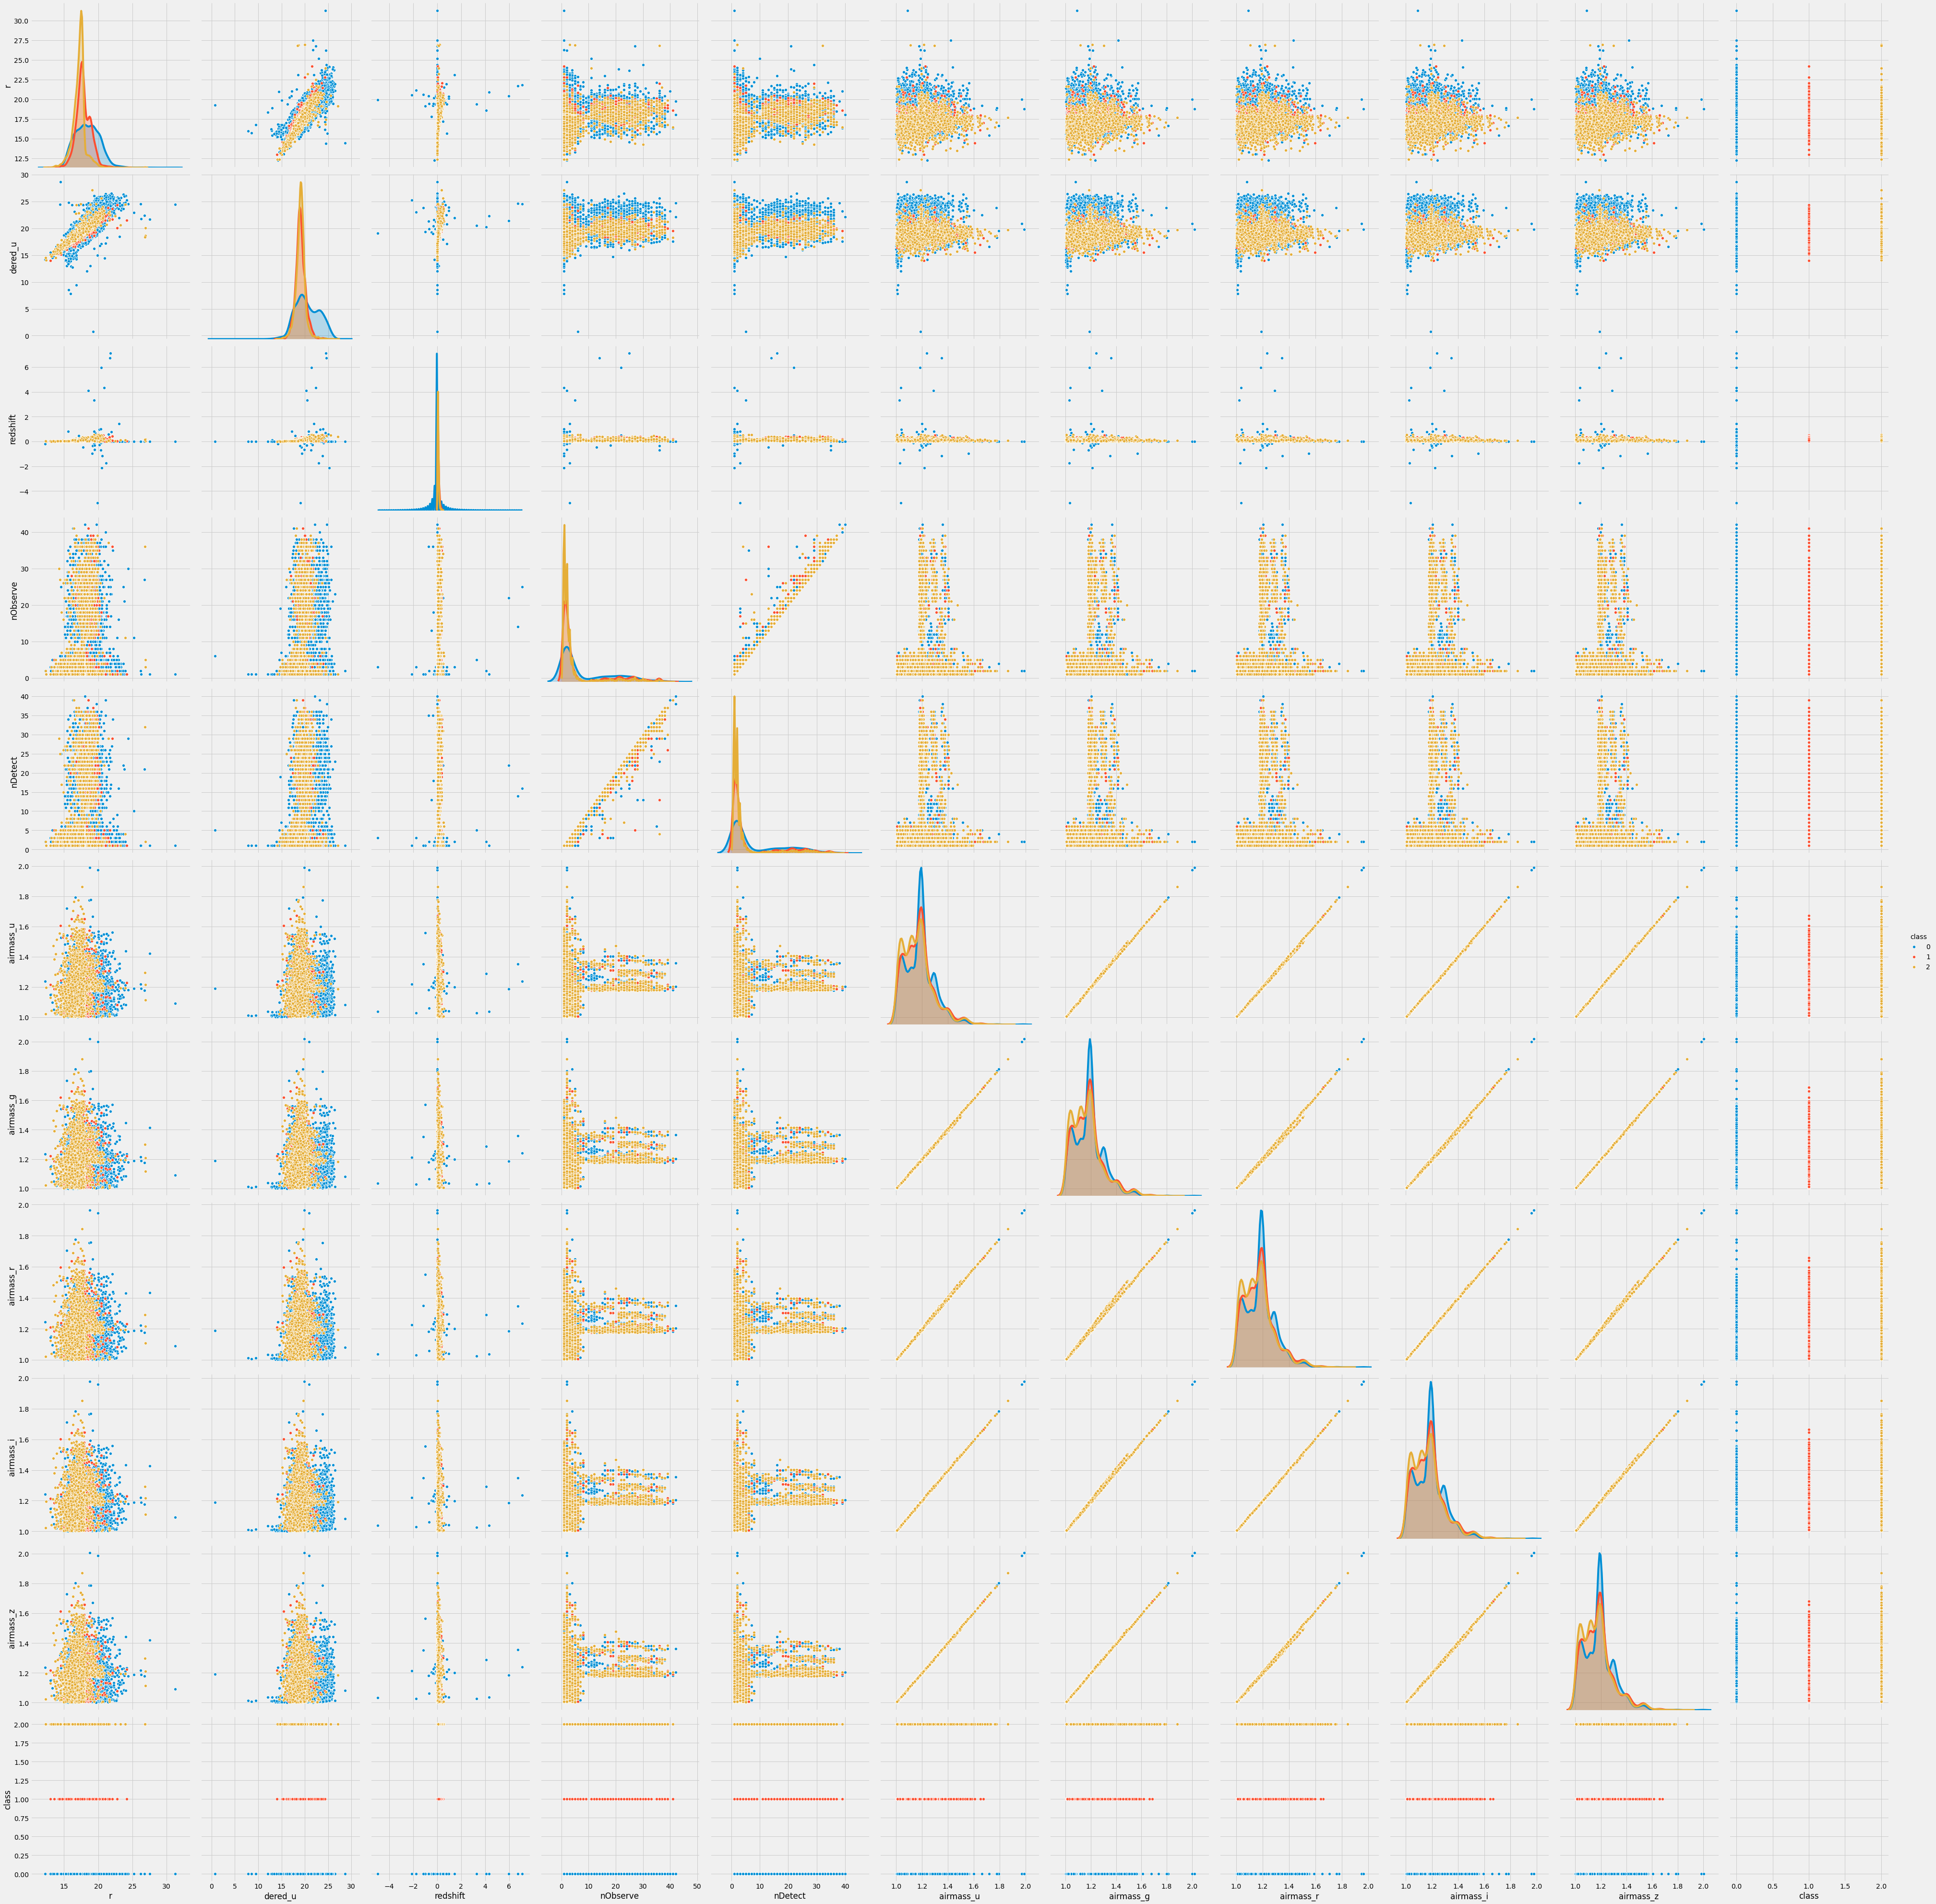

In [46]:
sns.pairplot(train.sample(n=10000), vars=['r','dered_u','redshift', 'nObserve', 'nDetect', 'airmass_u', 'airmass_g', 'airmass_r', 'airmass_i', 'airmass_z', 'class'], hue='class', size=5)


<h4> XGBoost</h4>

In [22]:
x = train.iloc[:,:18]
x

,id,z,redshift,dered_u,dered_g,dered_r,dered_i,dered_z,nObserve,airmass_u,class,d_dered_u,d_dered_g,d_dered_r,d_dered_i,d_dered_z,d_dered_ig,d_dered_zg
0,0,16.9396,-8.1086e-05,23.1243,20.2578,18.9551,17.6321,16.9089,2.9444,1.1898,0.0,-0.1397,-0.0790,-0.0544,-0.0403,-0.0307,-2.6257,-3.3488
1,1,13.1689,4.5061e-03,14.9664,14.0045,13.4114,13.2363,13.1347,0.6931,1.2533,1.0,-0.0857,-0.0574,-0.0410,-0.0322,-0.0343,-0.7683,-0.8698
2,2,15.3500,4.7198e-04,16.6076,15.6866,15.4400,15.3217,15.2961,1.0986,1.0225,0.0,-0.1787,-0.1388,-0.0963,-0.0718,-0.0540,-0.3649,-0.3905
3,3,19.6346,5.8143e-06,25.3536,20.9947,20.0873,19.7947,19.5552,1.6094,1.2054,0.0,-0.3070,-0.1941,-0.1339,-0.1003,-0.0795,-1.2000,-1.4395
4,4,17.9826,-3.3247e-05,23.7714,20.4338,18.8630,18.1903,17.8759,2.6391,1.1939,0.0,-0.6820,-0.2653,-0.1794,-0.1339,-0.1067,-2.2436,-2.5579
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
399995,399995,18.0627,-3.1726e-04,19.3361,18.3933,18.0860,17.9861,17.9670,2.8904,1.1858,-1.0,-0.3372,-0.2684,-0.1848,-0.1364,-0.0957,-0.4072,-0.4263
399996,399996,20.8458,6.5455e-02,21.3993,20.6399,20.5451,20.9507,20.7827,2.1972,1.2850,-1.0,-0.1235,-0.0884,-0.0636,-0.0542,-0.0631,0.3108,0.1428
399997,399997,18.2018,-8.4180e-04,18.9136,17.8753,17.9047,18.0043,18.0400,0.6931,1.1885,-1.0,-0.4855,-0.3657,-0.2558,-0.1935,-0.1618,0.1289,0.1647
399998,399998,16.5946,4.2817e-02,18.7715,17.4880,17.0557,16.7660,16.5585,2.8904,1.1804,-1.0,-0.1282,-0.1129,-0.0772,-0.0564,-0.0361,-0.7220,-0.9295


In [14]:
cols_to_use = ['redshift','dered_u','u','dered_g','dered_r','dered_i','dered_z']
X = train[cols_to_use]
y = train['class']

seed = 7
test_size = 0.20
#20%는 테스트용, 80%는 학습용
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = test_size , random_state = seed)
print(X_train.shape,X_test.shape)

KeyError: "['u'] not in index"

In [262]:
my_model = XGBRegressor(learning_rate = 0.2)
my_model.fit(X_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.2, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

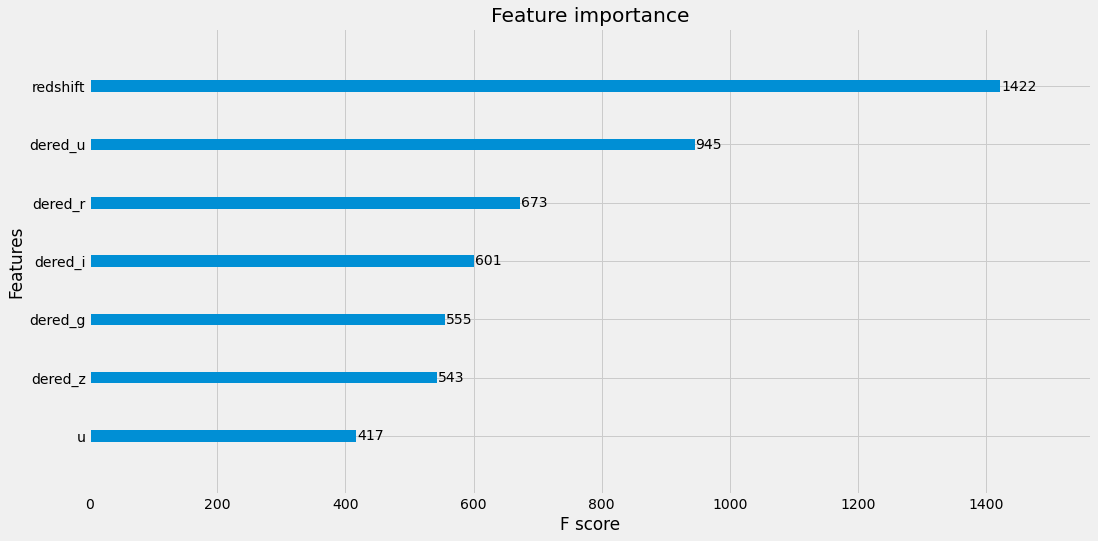

In [263]:
plot_importance(my_model)

In [264]:
y_pred = my_model.predict(X_test)
predictions = [round(value) for value in y_pred]

In [265]:
mean_squared_error(y_test, y_pred)


0.059241210494147795

In [266]:
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 92.14%


In [245]:

submission = pd.read_csv('./simple_submission.csv')
pred = my_model.predict(test)
submission['class'] = pred
submission.to_csv("submission.csv",index=False, encoding='utf-8-sig')


EmptyDataError: No columns to parse from file